In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
pd.set_option("display.max_columns", None)
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
print(dataset.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [6]:
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
print(dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
## Lets prepare the dataframe

In [9]:
data=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [10]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data['diagnosis']=dataset.target

In [12]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Exploring the Data**

In [13]:
data.shape

(569, 31)

In [14]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [17]:
## Check the missing values
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

**Draw boxplots to visualize outliers**

Text(0, 0.5, 'worst fractal dimension')

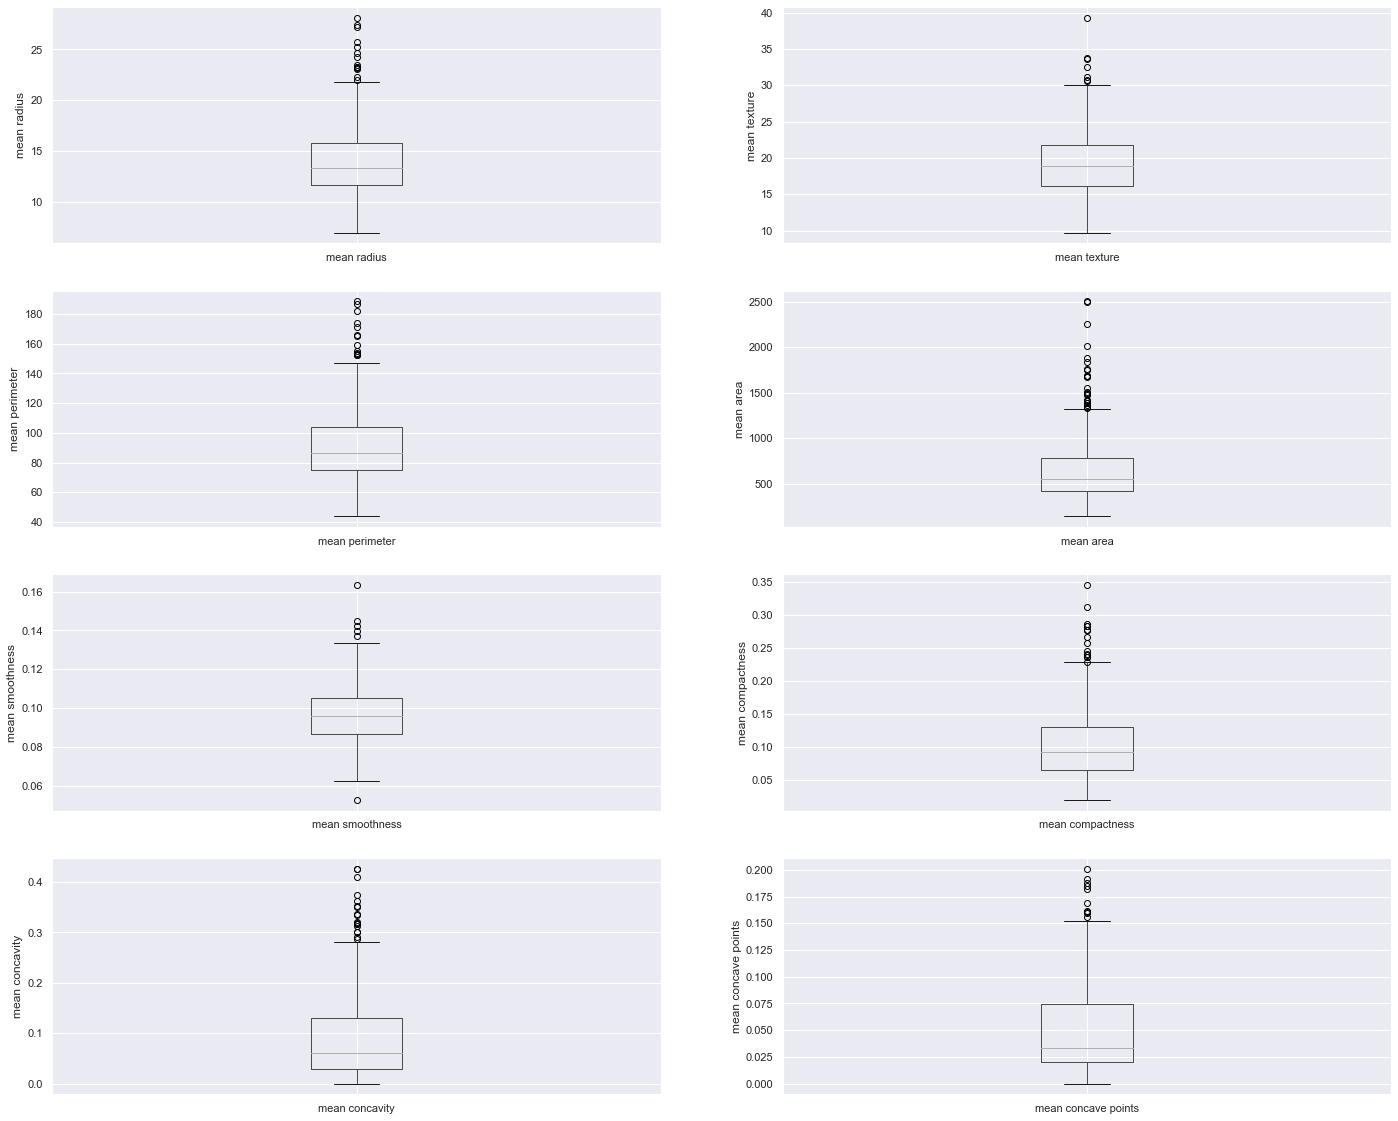

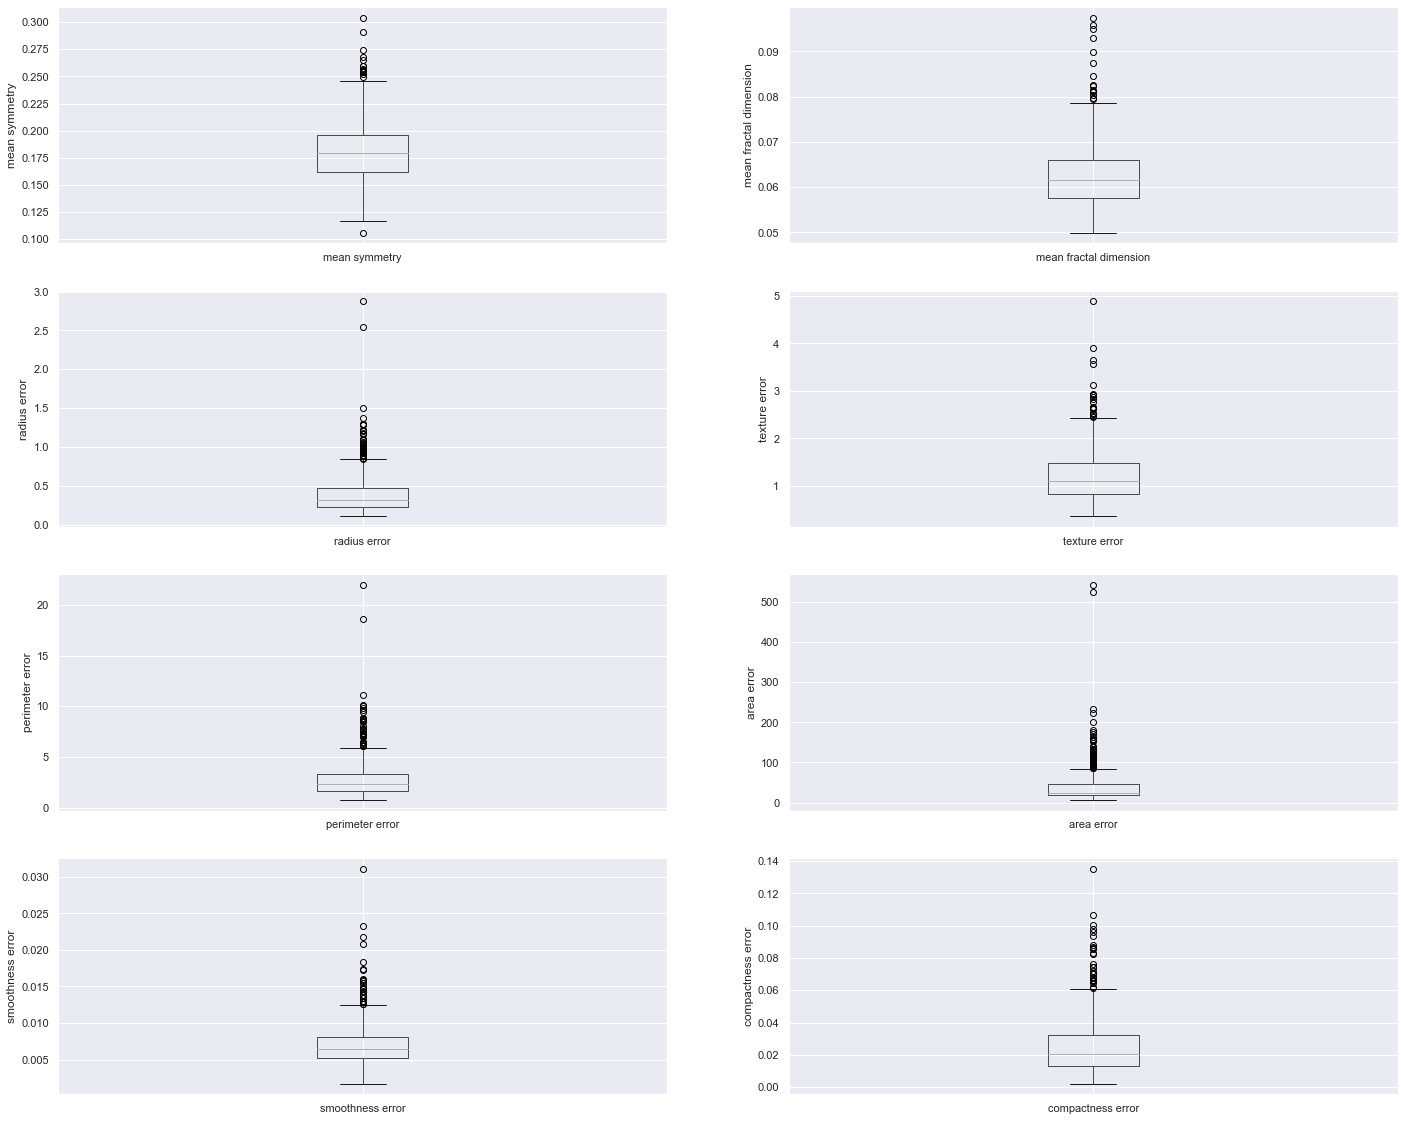

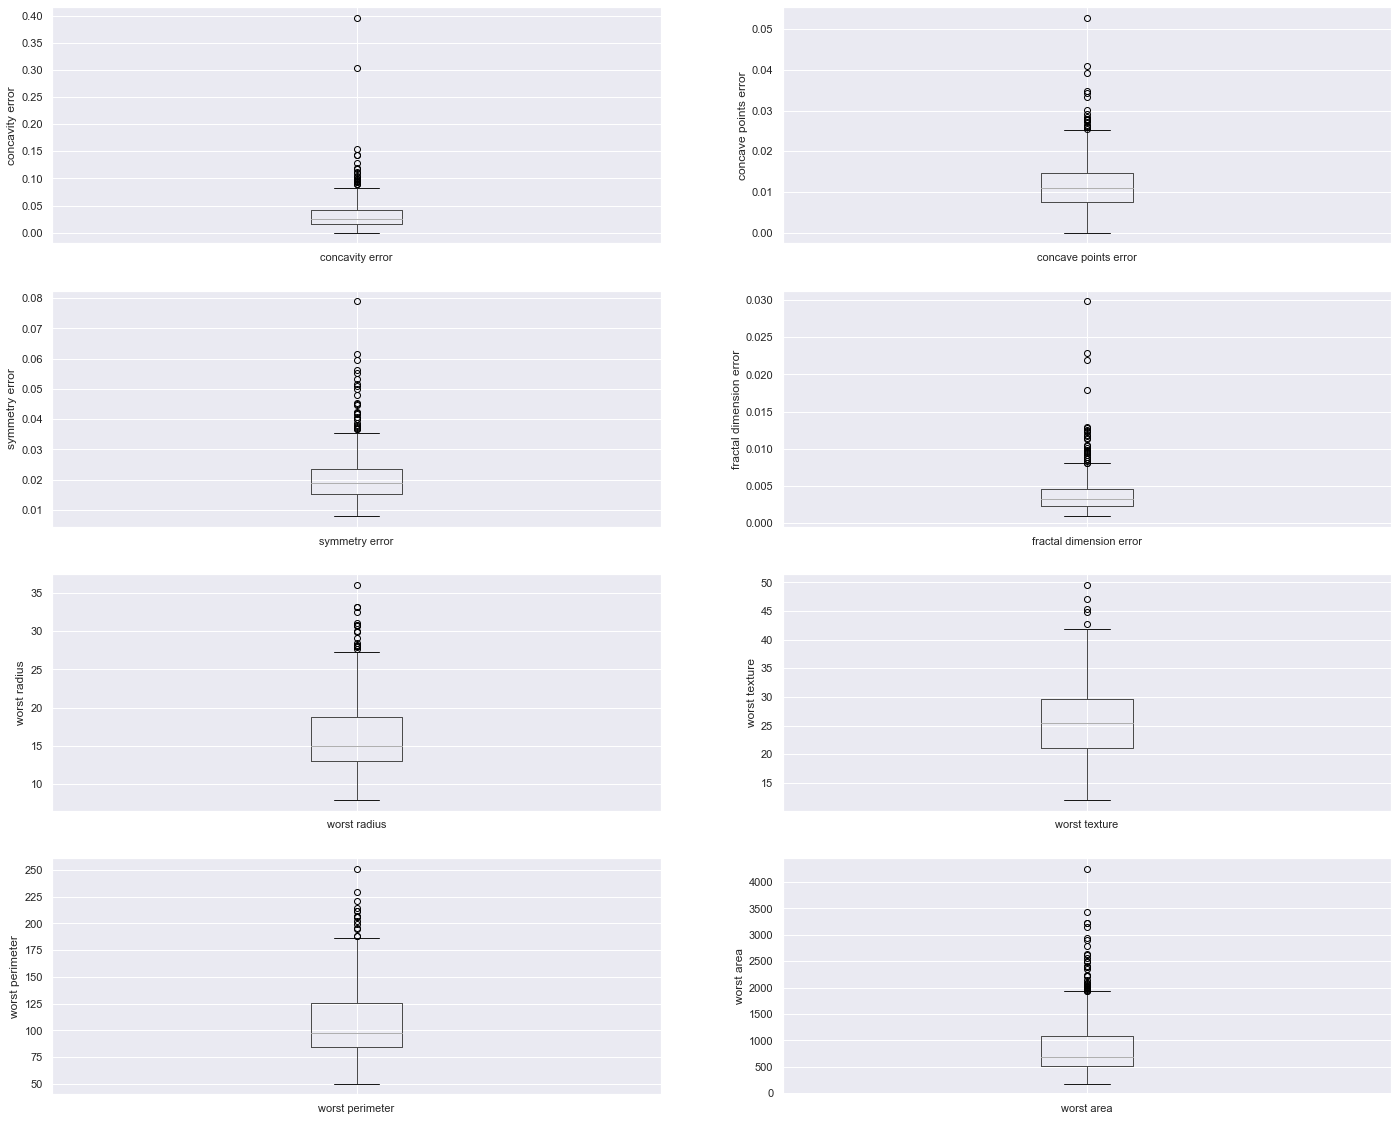

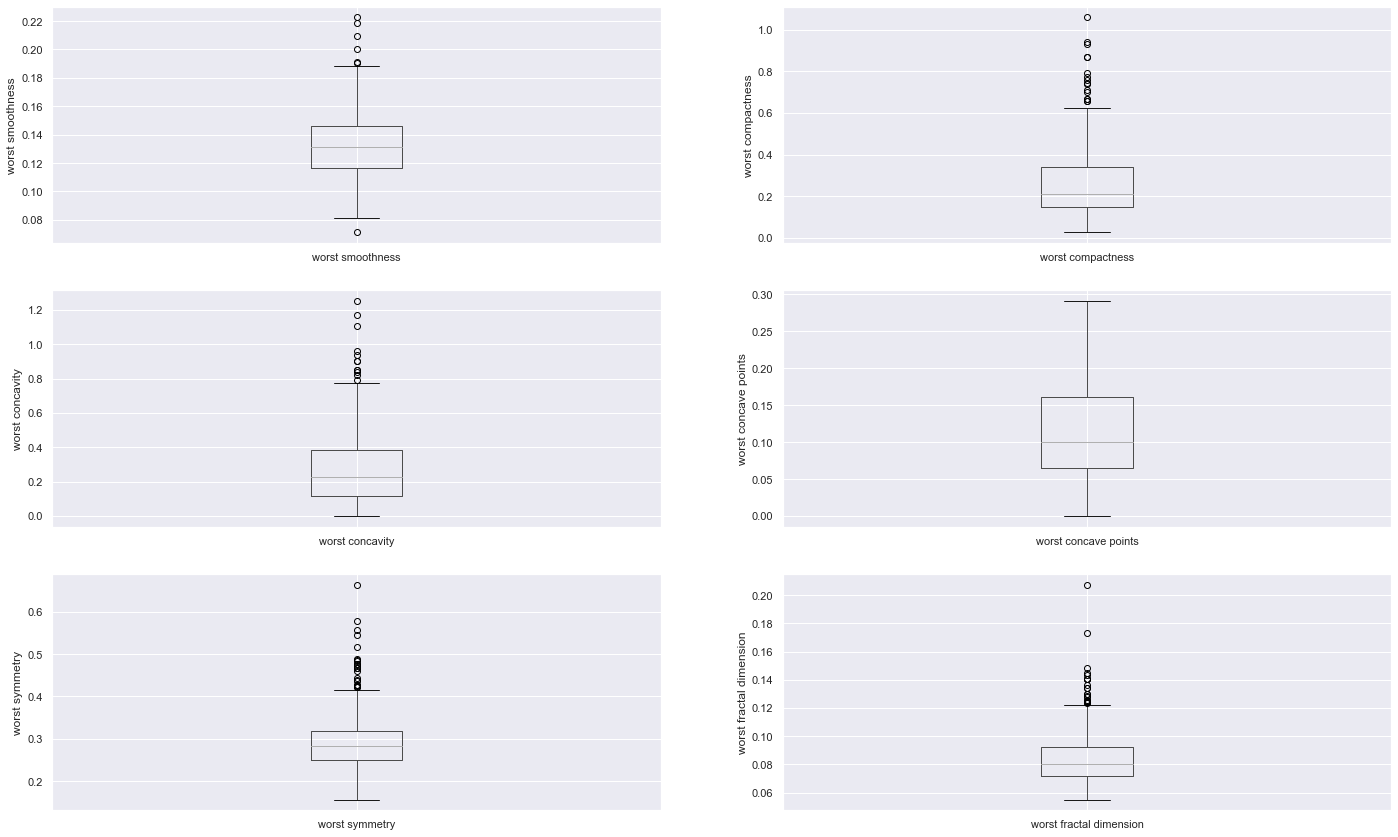

In [86]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = data.boxplot(column='mean radius')
fig.set_title('')
fig.set_ylabel('mean radius')


plt.subplot(4, 2, 2)
fig = data.boxplot(column='mean texture')
fig.set_title('')
fig.set_ylabel('mean texture')


plt.subplot(4, 2, 3)
fig = data.boxplot(column='mean perimeter')
fig.set_title('')
fig.set_ylabel('mean perimeter')


plt.subplot(4, 2, 4)
fig = data.boxplot(column='mean area')
fig.set_title('')
fig.set_ylabel('mean area')


plt.subplot(4, 2, 5)
fig = data.boxplot(column='mean smoothness')
fig.set_title('')
fig.set_ylabel('mean smoothness')


plt.subplot(4, 2, 6)
fig = data.boxplot(column='mean compactness')
fig.set_title('')
fig.set_ylabel('mean compactness')


plt.subplot(4, 2, 7)
fig = data.boxplot(column='mean concavity')
fig.set_title('')
fig.set_ylabel('mean concavity')


plt.subplot(4, 2, 8)
fig = data.boxplot(column='mean concave points')
fig.set_title('')
fig.set_ylabel('mean concave points')


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = data.boxplot(column='mean symmetry')
fig.set_title('')
fig.set_ylabel('mean symmetry')


plt.subplot(4, 2, 2)
fig = data.boxplot(column='mean fractal dimension')
fig.set_title('')
fig.set_ylabel('mean fractal dimension')


plt.subplot(4, 2, 3)
fig = data.boxplot(column='radius error')
fig.set_title('')
fig.set_ylabel('radius error')


plt.subplot(4, 2, 4)
fig = data.boxplot(column='texture error')
fig.set_title('')
fig.set_ylabel('texture error')


plt.subplot(4, 2, 5)
fig = data.boxplot(column='perimeter error')
fig.set_title('')
fig.set_ylabel('perimeter error')


plt.subplot(4, 2, 6)
fig = data.boxplot(column='area error')
fig.set_title('')
fig.set_ylabel('area error')


plt.subplot(4, 2, 7)
fig = data.boxplot(column='smoothness error')
fig.set_title('')
fig.set_ylabel('smoothness error')


plt.subplot(4, 2, 8)
fig = data.boxplot(column='compactness error')
fig.set_title('')
fig.set_ylabel('compactness error')


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = data.boxplot(column='concavity error')
fig.set_title('')
fig.set_ylabel('concavity error')


plt.subplot(4, 2, 2)
fig = data.boxplot(column='concave points error')
fig.set_title('')
fig.set_ylabel('concave points error')

plt.subplot(4, 2, 3)
fig = data.boxplot(column='symmetry error')
fig.set_title('')
fig.set_ylabel('symmetry error')


plt.subplot(4, 2, 4)
fig = data.boxplot(column='fractal dimension error')
fig.set_title('')
fig.set_ylabel('fractal dimension error')


plt.subplot(4, 2, 5)
fig = data.boxplot(column='worst radius')
fig.set_title('')
fig.set_ylabel('worst radius')


plt.subplot(4, 2, 6)
fig = data.boxplot(column='worst texture')
fig.set_title('')
fig.set_ylabel('worst texture')


plt.subplot(4, 2, 7)
fig = data.boxplot(column= 'worst perimeter')
fig.set_title('')
fig.set_ylabel( 'worst perimeter')


plt.subplot(4, 2, 8)
fig = data.boxplot(column='worst area')
fig.set_title('')
fig.set_ylabel('worst area')

                   
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = data.boxplot(column='worst smoothness')
fig.set_title('')
fig.set_ylabel('worst smoothness')


plt.subplot(4, 2, 2)
fig = data.boxplot(column='worst compactness')
fig.set_title('')
fig.set_ylabel('worst compactness')


plt.subplot(4, 2, 3)
fig = data.boxplot(column='worst concavity')
fig.set_title('')
fig.set_ylabel('worst concavity')


plt.subplot(4, 2, 4)
fig = data.boxplot(column='worst concave points')
fig.set_title('')
fig.set_ylabel('worst concave points')


plt.subplot(4, 2, 5)
fig = data.boxplot(column='worst symmetry')
fig.set_title('')
fig.set_ylabel('worst symmetry')


plt.subplot(4, 2, 6)
fig = data.boxplot(column='worst fractal dimension',)
fig.set_title('')
fig.set_ylabel('worst fractal dimension')

In [18]:
## EDA
data.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [19]:
#import seaborn as sns
#sns.pairplot(data)

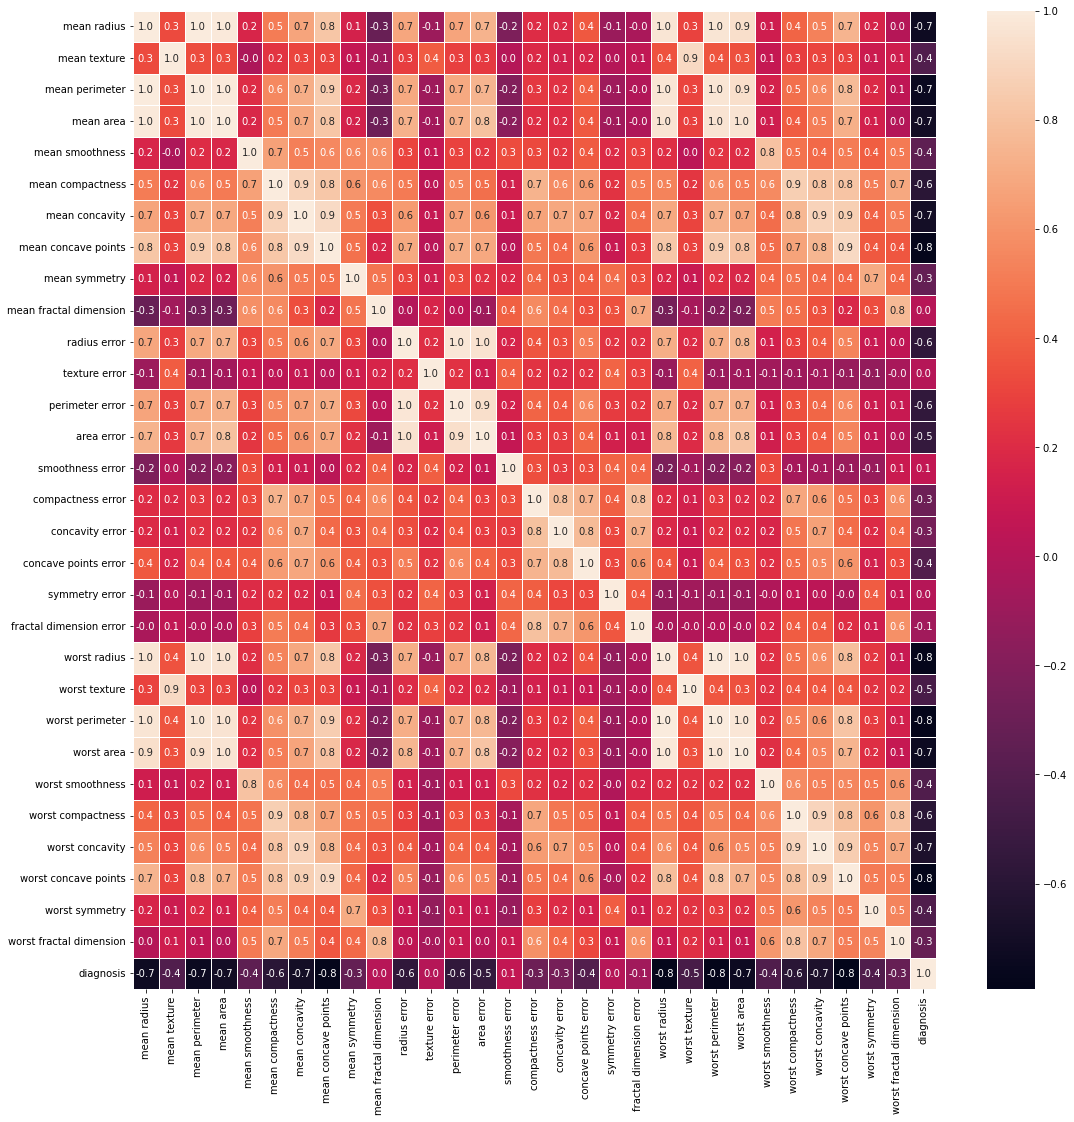

In [20]:
corr_Matrix = data.corr ()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap (corr_Matrix, linewidths = 0.5, annot = True, fmt= '.1f',ax=ax)
plt.show ()

In [21]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

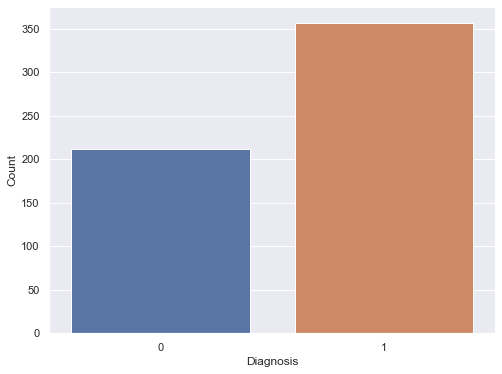

In [22]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot (x = 'diagnosis',data = data)
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show ()

**Conclusion:-**
* In the above plots, 0 corresponds to Malignant and 1 corresponds to Benign .
* The visuals show a trend that At lower values of the features, the diagnosis is predominantly Benign and at higher values, Malignant has been the chief diagnosis

**DATA PRE- PROCESSING**

In [23]:
x=data.iloc[:,:30]

In [24]:
y=data.iloc[:,30]

In [25]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size = 0.33, random_state =32)

In [26]:
X_train.shape

(381, 30)

In [27]:
X_test.shape

(188, 30)

In [28]:
y_train.shape

(381,)

In [29]:
y_test.shape

(188,)

**FEATURE SCALING**

In [30]:
standard_scaler = StandardScaler ()
X_train = standard_scaler.fit_transform (X_train)
X_test = standard_scaler.transform (X_test)

In [31]:
print (X_train)

[[ 1.83146675  1.92550588  1.76477017 ...  0.67920325 -0.73058314
  -0.04342091]
 [ 0.48131708  0.23208698  0.45742111 ...  0.54870328  1.77467177
   1.18021028]
 [-0.76104752 -0.07254923 -0.79360506 ... -0.78534811  0.60576749
  -0.7494434 ]
 ...
 [-0.48023908  0.57928265 -0.48074574 ...  0.12302484  0.1307995
   0.45037143]
 [-0.66744471 -0.02326984 -0.70480399 ... -0.85712309  0.95998091
  -0.76849649]
 [-1.067384    1.88070644 -1.06083049 ... -0.33108396 -1.07030601
  -0.06723726]]


In [32]:
print (y_train)

233    0
223    0
289    1
518    1
170    1
      ..
252    0
403    1
88     1
310    1
555    1
Name: diagnosis, Length: 381, dtype: int32


In [33]:
print (X_test)

[[-0.61355218 -0.19350772 -0.58188029 ...  0.01893558  0.81507542
  -0.02383858]
 [-0.87450548 -0.45110451 -0.81169416 ...  0.66677468 -0.56474685
   0.59379879]
 [ 0.06719555 -0.53622345 -0.04825165 ... -1.23122298 -0.69677186
  -1.21200987]
 ...
 [-0.48023908 -0.15094825 -0.51240167 ... -0.43750357  0.14851017
  -0.64835623]
 [-0.0519353   0.33288572 -0.0700408  ... -0.68560885 -1.0332746
   0.04337646]
 [ 0.62313953  0.06632904  0.75342467 ...  1.00856029  0.6878806
   0.3842149 ]]


In [34]:
print (y_test)

216    1
440    1
270    1
16     0
483    1
      ..
346    1
56     0
107    1
544    1
479    0
Name: diagnosis, Length: 188, dtype: int32


**Building our Model without PCA**

**SVM**

In [35]:
classifier_svm = SVC (kernel = 'rbf', random_state = 32)
classifier_svm.fit (X_train, y_train)
Y_pred_svm = classifier_svm.predict (X_test)
cm_svm = confusion_matrix (y_test, Y_pred_svm)
acc_svm = accuracy_score (y_test, Y_pred_svm)

In [36]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,Y_pred_svm))
print("MSE:",metrics.mean_squared_error(y_test,Y_pred_svm))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,Y_pred_svm)))

MAE: 0.031914893617021274
MSE: 0.031914893617021274
RMSE: 0.1786474002526241


In [77]:
from sklearn.metrics import classification_report
print("Accuracy Score of SVM Model :", accuracy_score(y_test, Y_pred_svm))
print(classification_report(y_test,Y_pred_svm))

Accuracy Score of SVM Model : 0.9680851063829787
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        76
           1       0.96      0.98      0.97       112

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



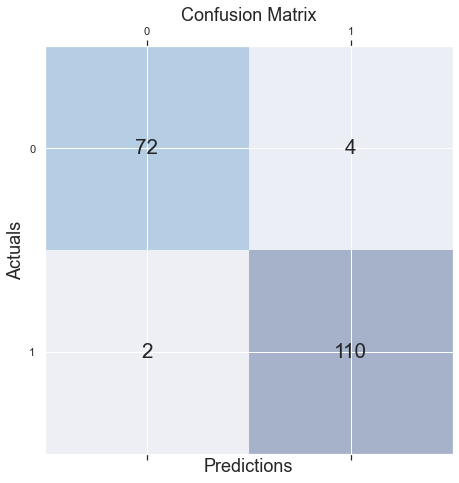

In [78]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=Y_pred_svm)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Decision Tree CLassifier**

In [37]:
classifier_dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
classifier_dtc.fit (X_train, y_train)
Y_pred_dtc = classifier_dtc.predict (X_test)
cm_dtc = confusion_matrix (y_test, Y_pred_dtc)
acc_dtc = accuracy_score (y_test, Y_pred_dtc)

In [38]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,Y_pred_dtc))
print("MSE:",metrics.mean_squared_error(y_test,Y_pred_dtc))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,Y_pred_dtc)))

MAE: 0.09042553191489362
MSE: 0.09042553191489362
RMSE: 0.30070838351282064


In [75]:
from sklearn.metrics import classification_report
print("Accuracy Score of Decision Tree Model :", accuracy_score(y_test, Y_pred_dtc))
print(classification_report(y_test,Y_pred_dtc))

Accuracy Score of Decision Tree Model : 0.9095744680851063
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        76
           1       0.93      0.92      0.92       112

    accuracy                           0.91       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.91      0.91      0.91       188



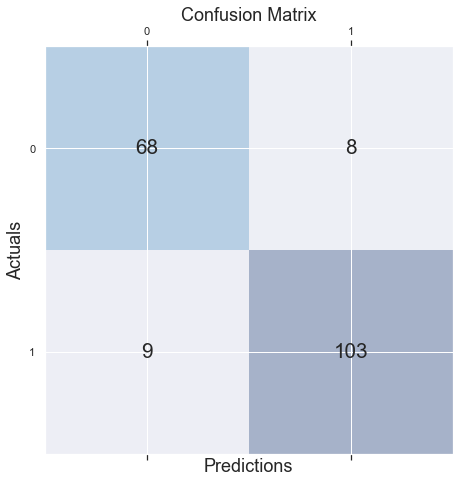

In [76]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=Y_pred_dtc)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Random Forest**

In [39]:
classifier_rfc = RandomForestClassifier (n_estimators = 100, criterion = 'entropy', random_state = 1)
classifier_rfc.fit (X_train, y_train)
Y_pred_rfc = classifier_rfc.predict (X_test)
cm_rfc = confusion_matrix (y_test, Y_pred_rfc)
acc_rfc = accuracy_score (y_test, Y_pred_rfc)
acc_rfc

0.9627659574468085

In [40]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,Y_pred_rfc))
print("MSE:",metrics.mean_squared_error(y_test,Y_pred_rfc))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,Y_pred_rfc)))

MAE: 0.03723404255319149
MSE: 0.03723404255319149
RMSE: 0.19296124624698993


**CLASSIFICATION REPORT RANDOM FOREST MODEL**

In [62]:
from sklearn.metrics import classification_report
print("Accuracy Score of Random Forest Model :", accuracy_score(y_test, Y_pred_rfc))
print(classification_report(y_test,Y_pred_rfc))

Accuracy Score of Random Forest Model : 0.9627659574468085
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.96      0.97      0.97       112

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



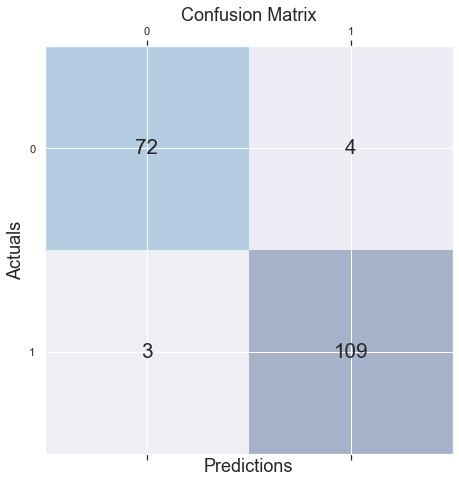

In [74]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=Y_pred_rfc)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Comparing the 3 Models**

In [41]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE"]
df_pred = {"NAME OF MODEL" : ["SVM", "DECISION TREE", "RANDOM FOREST"],
           "ACCURACY SCORE " : [acc_svm, acc_dtc, acc_rfc]}
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE
0,SVM,0.968085
1,DECISION TREE,0.909574
2,RANDOM FOREST,0.962766


# PCA

**Scikit-Learn's PCA class implements PCA algorithm using the code below. Before diving deep, we will explain another important concept called explained variance ratio.**

**Explained Variance Ratio:-**
* A very useful piece of information is the explained variance ratio of each principal component. It is available via the explained_variance_ratio_ variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

Now, let's get to the PCA implementation.

**Feature Sclaing**

In [42]:
standard_scaler = StandardScaler ()
X_train = standard_scaler.fit_transform (X_train )
X_test = standard_scaler.transform (X_test)

In [43]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([4.45039120e-01, 1.91383333e-01, 9.26691138e-02, 6.65422578e-02,
       5.43818824e-02, 4.08557198e-02, 2.06360166e-02, 1.51818246e-02,
       1.33829744e-02, 1.20749565e-02, 1.03405125e-02, 8.42440117e-03,
       7.87847039e-03, 4.97819560e-03, 3.47691295e-03, 2.52736425e-03,
       1.98703837e-03, 1.62748761e-03, 1.50158713e-03, 1.03303749e-03,
       9.71564693e-04, 8.28356193e-04, 6.27944732e-04, 5.76951039e-04,
       4.75754197e-04, 2.86368003e-04, 2.31561759e-04, 4.66590089e-05,
       2.81441937e-05, 4.49023253e-06])

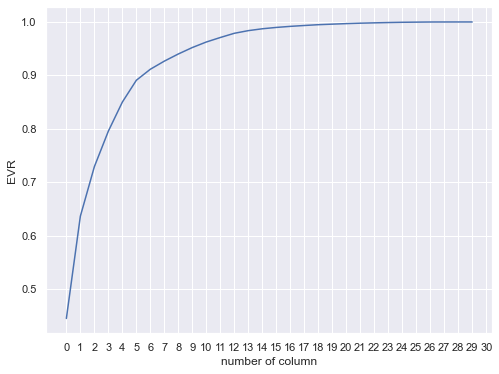

In [44]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of column')
plt.ylabel('EVR')
plt.xticks(np.arange(0, 31, step=1))
plt.show()

**Comment:-**
* We can see that approximately 95% of variance is explained by the first 10 variables.

* Only 5% of variance is explained by the remaining features. So, we can assume that it carries little information.

* So, We will drop it, train the model again and calculate the accuracy.

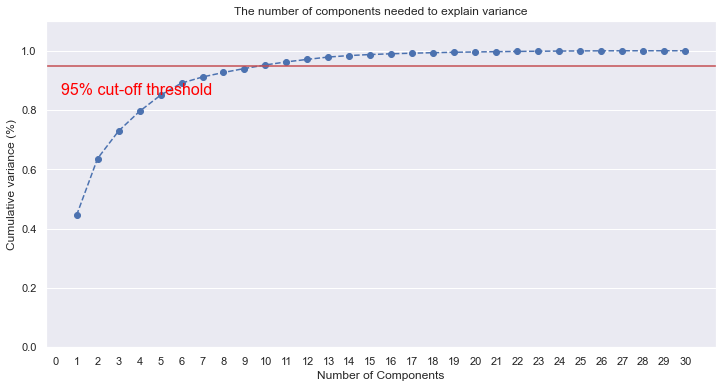

In [88]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.25, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


In [46]:
x=data[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error']]

In [47]:
y=data.iloc[:,30]

In [48]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size = 0.33, random_state =32)

**Feature Scaling**

In [49]:
standard_scaler = StandardScaler ()
X_train = standard_scaler.fit_transform (X_train)
X_test = standard_scaler.transform (X_test)

**SVM**

In [50]:
classifier_svm_pca = SVC (kernel = 'rbf', random_state = 32)
classifier_svm_pca.fit (X_train, y_train) 
Y_pred_svm_pca = classifier_svm_pca.predict (X_test)
cm_svm_pca = confusion_matrix (y_test, Y_pred_svm_pca)
acc_svm_pca = accuracy_score (y_test, Y_pred_svm_pca)

In [51]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,Y_pred_svm_pca))
print("MSE:",metrics.mean_squared_error(y_test,Y_pred_svm_pca))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,Y_pred_svm_pca)))

MAE: 0.0797872340425532
MSE: 0.0797872340425532
RMSE: 0.282466341433016


**Decision Tree**

In [52]:
classifier_dtc_pca = DecisionTreeClassifier (criterion = 'entropy', random_state = 32)
classifier_dtc_pca.fit (X_train, y_train)
Y_pred_dtc_pca = classifier_dtc_pca.predict (X_test)
cm_dtc_pca = confusion_matrix (y_test, Y_pred_dtc_pca)
acc_dtc_pca = accuracy_score (y_test, Y_pred_dtc_pca)

In [53]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,Y_pred_dtc_pca))
print("MSE:",metrics.mean_squared_error(y_test,Y_pred_dtc_pca))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,Y_pred_dtc_pca)))

MAE: 0.14361702127659576
MSE: 0.14361702127659576
RMSE: 0.37896836447993354


**Random Forest**

In [54]:
classifier_rfc_pca = RandomForestClassifier (n_estimators = 250, criterion = 'entropy', random_state = 32)
classifier_rfc_pca.fit (X_train, y_train)
Y_pred_rfc_pca = classifier_rfc_pca.predict (X_test)
cm_rfc_pca = confusion_matrix (y_test, Y_pred_rfc_pca)
acc_rfc_pca = accuracy_score (y_test, Y_pred_rfc_pca)

In [55]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,Y_pred_rfc_pca))
print("MSE:",metrics.mean_squared_error(y_test,Y_pred_rfc_pca))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,Y_pred_rfc_pca)))

MAE: 0.0851063829787234
MSE: 0.0851063829787234
RMSE: 0.2917299829957891


**Comparing the 3 models under PCA**

In [56]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE"]
df_pred = {"NAME OF MODEL" : ["SVM", "DECISION TREE", "RANDOM FOREST"],
           "ACCURACY SCORE " : [acc_svm_pca, acc_dtc_pca, acc_rfc_pca]}
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE
0,SVM,0.920213
1,DECISION TREE,0.856383
2,RANDOM FOREST,0.914894


**SAVING BEST MODEL FOR PREDICTION**

In [92]:
## Pickle
import pickle

# save model
pickle.dump(Y_pred_svm, open('model.pkl', 'wb'))

# load model
breast_cancer_prediciton_model = pickle.load(open('model.pkl', 'rb'))